# Example of how to use classification code for ship logbooks

### Imports

In [1]:
from exploringShipLogbooks.config import non_slave_ships
from exploringShipLogbooks.classification import LogbookClassifier

### Initialize classifier
- Classification algorithm can be set to "Naive Bayes" or "Decision Tree"

In [2]:
cl = LogbookClassifier(classification_algorithm="Naive Bayes")

### Load Data, Clean data, and Perform Classification
- This function loads, cleans, and classifies data
- Options include:
    - fuzz - boolean value for whether to perform fuzzy string matching on values or not
    - export_csv - boolean value to determine whether classification output is saved. The csv contains information for every log used in the code, with the following key:
        - 0 = unclassified data
        - 1 = data used as negative training data
        - 2 = data used as positive validation data from cliwoc database
        - 3 = slave voyages database data
        - 4 = data classified as a non-slave ship
        - 5 = data classified a sa slave ship

In [3]:
cl.load_clean_and_classify(fuzz=False, export_csv=True)

Loading data...


/Applications/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


Finding ship logs that mention slaves...
Found  464  logs that mention slaves
Finding training data...
Cleaning data...
Joining data sets...
Encoding data...
Extracting training and validation data...
Fitting classifier...
Validating classifier...

validation set 0  results:  Counter({0.0: 56})
validation set 1  results:  Counter({1.0: 4542})
Classifying unknown data...

98.89 of data was classified as  0.0
1.11 of data was classified as  1.0
Exporting data...


### How to access data from outside of the classifier

In [4]:
# data that was classified (unknown class before classification)
cl.unclassified_logs.head()

,argentina,brazil,british,danish,denmark,dutch,france,french,great britain,hamburg,...,willemsoord,williamsburg,woolwich,york factory,"york harbour, newfoundland",zeeland,zierikzee,Year,slave_logs,no_data
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1785,4,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1789,4,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1847,4,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1849,4,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1760,4,1


In [5]:
# data used for validation: 20% of slave voyage logs
cl.validation_set_2.head()

,argentina,brazil,british,danish,denmark,dutch,france,french,great britain,hamburg,...,willemsoord,williamsburg,woolwich,york factory,"york harbour, newfoundland",zeeland,zierikzee,Year,slave_logs,no_data
1651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1817,3,0
1652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1817,3,0
1653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1817,3,0
1654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1817,3,0
1655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1816,3,0


In [6]:
# data used for validation: logs that mention slaves in cliwoc data set
cl.validation_set_1.head()

,argentina,brazil,british,danish,denmark,dutch,france,french,great britain,hamburg,...,willemsoord,williamsburg,woolwich,york factory,"york harbour, newfoundland",zeeland,zierikzee,Year,slave_logs,no_data
14,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1763,2,0
28,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1786,2,0
38,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1761,2,0
53,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1773,2,0
731,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1756,2,1


In [7]:
# data used for training classifier
cl.training_data.head()

,argentina,brazil,british,danish,denmark,dutch,france,french,great britain,hamburg,...,willemsoord,williamsburg,woolwich,york factory,"york harbour, newfoundland",zeeland,zierikzee,Year,slave_logs,no_data
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1848,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1849,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1807,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1819,1,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1760,1,0


### Sample plots of data

In [8]:
import exploringShipLogbooks
import os.path as op
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd

In [9]:
# load un-cleaned slave_voyage_logs data
data_path = op.join(exploringShipLogbooks.__path__[0], 'data')
file_name = data_path + '/tastdb-exp-2010'
slave_voyage_logs = pd.read_pickle(file_name)

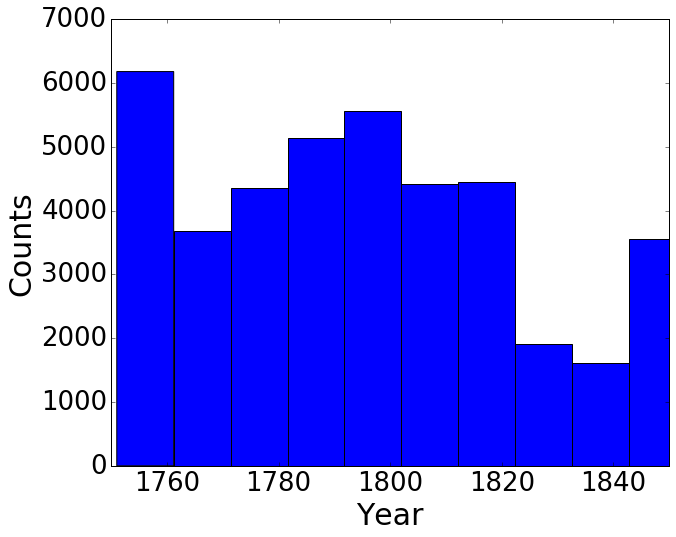

In [10]:
fig1, ax1 = plt.subplots()

ax1.hist(pd.concat([cl.validation_set_2, cl.training_data], ignore_index = True)['Year'])
ax1.set_xlabel('Year', fontsize = 30)
ax1.set_ylabel('Counts', fontsize = 30)
plt.xlim([1750, 1850])

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

fig1.set_size_inches(10, 8)

plt.savefig('slave_voyage_years.png')

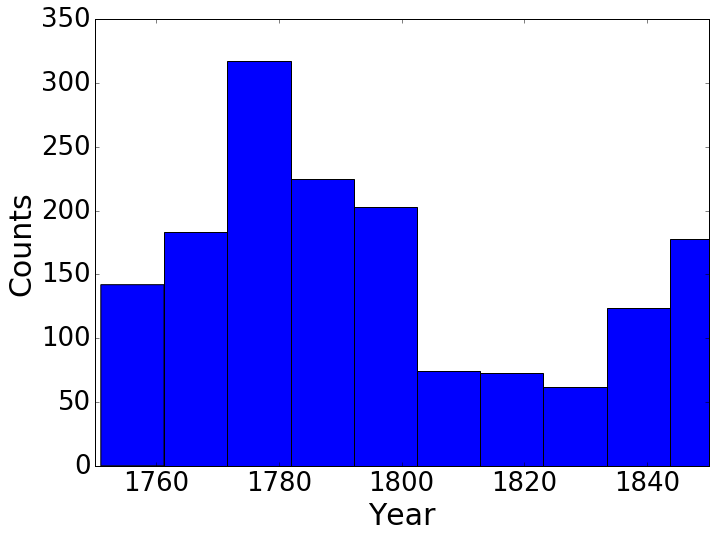

In [11]:
fig2, ax2 = plt.subplots()

ax2.hist(pd.concat([cl.validation_set_1, cl.unclassified_logs], ignore_index = True)['Year'])
ax2.set_xlabel('Year', fontsize = 30)
ax2.set_ylabel('Counts', fontsize = 30)
plt.xlim([1750, 1850])

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

fig2.set_size_inches(11, 8)

plt.savefig('cliwoc_years.jpeg')

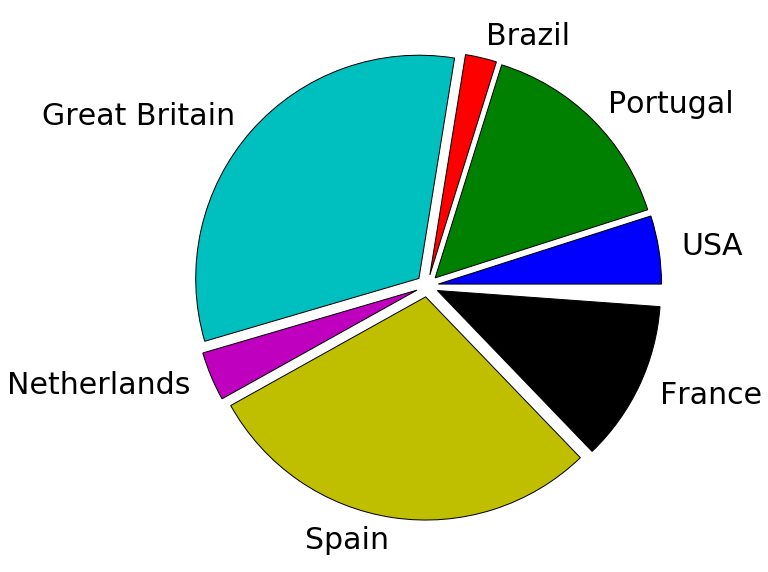

In [12]:
fractions = []
fract_dict = dict(slave_voyage_logs['national'].value_counts(normalize=True))
fractions = []
nats = []
for key in fract_dict:
    if fract_dict[key] > 0.01:
        nats.append(key)
        fractions.append(fract_dict[key])

explode=[0.05] * len(fractions)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,10)
matplotlib.rcParams['font.size'] = 30

matplotlib.pylab.pie(fractions, labels = nats, explode = explode)

plt.savefig('slave_voyages_nats.png')

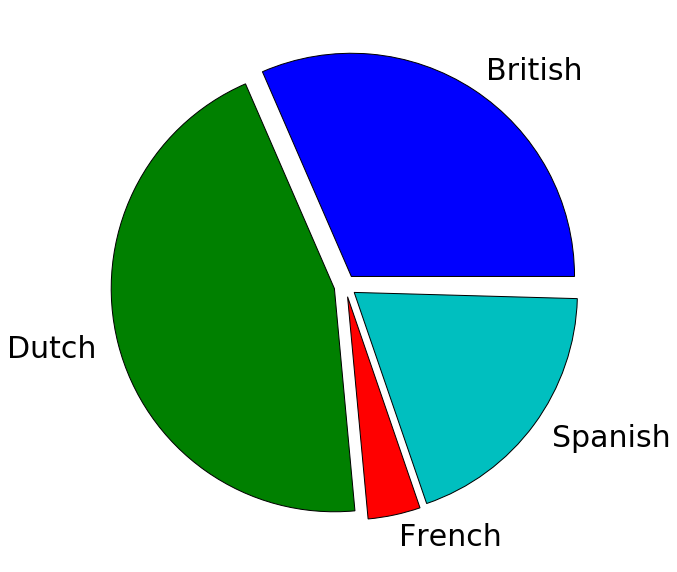

In [13]:
fractions = []
fract_dict = dict(cl.cliwoc_data_all['Nationality'].value_counts(normalize=True))
fractions = []
nats = []
for key in fract_dict:
    if fract_dict[key] > 0.01:
        nats.append(key)
        fractions.append(fract_dict[key])

explode=[0.05] * len(fractions)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,10)
matplotlib.rcParams['font.size'] = 30

matplotlib.pylab.pie(fractions, labels = nats, explode = explode)

plt.savefig('cliwoc_nats.png')